In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Data.csv")
df

,Days,Outlook,Temparature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Sunny,Warm,Outdoor,No
2,3,Cloudy,Warm,Indoor,No
3,4,Sunny,Warm,Indoor,No
4,5,Cloudy,Cold,Indoor,Yes
5,6,Cloudy,Cold,Outdoor,Yes
6,7,Sunny,Cold,Outdoor,Yes


### ***Data Preprocessing***

In [3]:
df = df.drop('Days',axis=1)
df

,Outlook,Temparature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Sunny,Warm,Outdoor,No
2,Cloudy,Warm,Indoor,No
3,Sunny,Warm,Indoor,No
4,Cloudy,Cold,Indoor,Yes
5,Cloudy,Cold,Outdoor,Yes
6,Sunny,Cold,Outdoor,Yes


In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [5]:
df['Outlook'] = label_encoder.fit_transform(df['Outlook'])
df['Temparature'] = label_encoder.fit_transform(df['Temparature'])
df['Routine'] = label_encoder.fit_transform(df['Routine'])
df

,Outlook,Temparature,Routine,Wear Jacket?
0,1,0,0,No
1,1,1,1,No
2,0,1,0,No
3,1,1,0,No
4,0,0,0,Yes
5,0,0,1,Yes
6,1,0,1,Yes


In [6]:
X = df.drop('Wear Jacket?',axis=1)
X

,Outlook,Temparature,Routine
0,1,0,0
1,1,1,1
2,0,1,0
3,1,1,0
4,0,0,0
5,0,0,1
6,1,0,1


In [7]:
y = df[["Wear Jacket?"]]
y

,Wear Jacket?
0,No
1,No
2,No
3,No
4,Yes
5,Yes
6,Yes


### ***Decision Tree Classifier***

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
clf = DecisionTreeClassifier()

In [14]:
clf.fit(X, y) # Train full datasets

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


<img src="images/img11.png" width="400">

In [11]:
clf.predict([[1,0,1]])  #1=Sunny, 0=cold, 1=Outdoor

C:\Users\Rafiqul Islam\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

In [19]:
clf.predict([[1,0,0]])  #1=Sunny, 0=cold, 0=Indoor

C:\Users\Rafiqul Islam\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [21]:
clf.predict([[0,0,0]])  

C:\Users\Rafiqul Islam\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

[Text(0.6666666666666666, 0.875, 'Temparature <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.5, 0.625, 'Routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'Outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.75, '  False')]

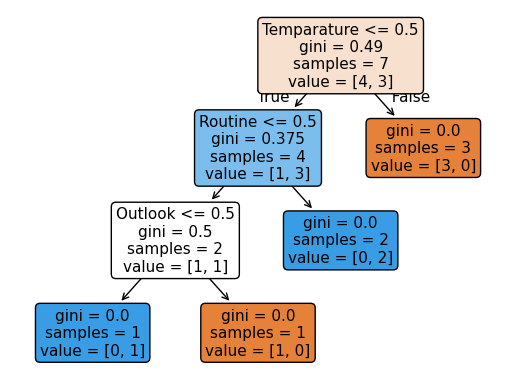

In [15]:
from sklearn import tree
tree.plot_tree(clf,filled=True,rounded=True,feature_names=X.columns)

[Text(0.6666666666666666, 0.875, 'Temparature <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.5, 0.625, 'Routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'Outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.75, '  False')]

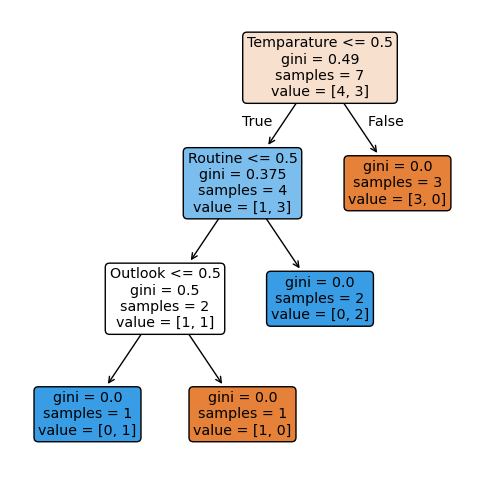

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
tree.plot_tree(clf,filled=True,rounded=True,feature_names=X.columns)